<a href="https://colab.research.google.com/github/jmquintana/data_science_sprint_4/blob/main/JoseQuintana_Proyecto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el datosset de casos totales, divididos por país [aquí.](
https://ourworldindatos.org/coronavirus-datos?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la cirva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales. **Nota**: **Hacer Bootsprap. Armar un gráfico de intervalos de errores de k. Hago una exponencial con el Kmax, con el Kmin, le ploteo arriba Kmed y a todo eso le superpongo los datos de casos mundiales.**

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó". **Nota: Investigar diferencias entre países que hicieron o no cuarentena como Arg, Brz o USA**.
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores. **Nota: Variación de k contagios, varaición de k muertes, ratio muertes = muertes/casos confirmados.**
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados. **Nota: Hay que armarse el data set con varios estadísticos por país para entrenar el modelo, idealmente independientes**.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.

#¡Comencemos!

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".



#### Repositorio de Github
El proyecto se encuentro publicado en el siguiente [link de Github](https://github.com/jmquintana/data_science_sprint_4)

In [1]:
## Importamos las librerías fundamentales para análisis de datos
import numpy as np
import pandas as pd
import pylab as plt
from google.colab import drive
from scipy.optimize import curve_fit
import seaborn as sns
## Importamos las funciones de accuracy y testeo de modelos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
## Importamos los modelos que voy a usar/probar:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
## Y las librerías de optimización de modelos:
from sklearn.model_selection import RandomizedSearchCV

# Definimos la matriz de confusión: 
def confusion(ytest,y_pred):
    names=["0","1"]
    cm=confusion_matrix(ytest,y_pred,normalize='true')
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",ax=ax) #fmt=".0f",
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [2]:
## Le damos formato a los gráficos
# sns.set_style("darkgrid")
sns.set_style("white")
plt.rc('font', size=12)
plt.rc('legend', fontsize=12)
plt.rc('axes', titlesize=16)
plt.rc('figure', titlesize=16)
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

In [3]:
## Montamos la unidad de disco externo
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
## Definimos las ubicaciones de los sets de datos descargados
daily_covid_cases_deaths = '/content/drive/MyDrive/Colab Notebooks/COVID/daily-covid-cases-deaths.csv'
cumulative_deaths_an_cases_covid19 = '/content/gdrive/MyDrive/Colab Notebooks/COVID/cumulative-deaths-and-cases-covid-19.csv'
daily_tests_an_daily_new_confirmed_covid_cases = '/content/gdrive/MyDrive/Colab Notebooks/COVID/daily-tests-and-daily-new-confirmed-covid-cases.csv'
covid_tests_cases_deaths = '/content/gdrive/MyDrive/Colab Notebooks/COVID/covid-tests-cases-deaths.csv'
covid_tests_cases_deaths_per_million = '/content/gdrive/MyDrive/Colab Notebooks/COVID/covid-tests-cases-deaths-per-million2.csv'  # Voy a usar estos datos para tener algo mas estandar.

In [5]:
## Cargamos los datos en un dataframe
datos = pd.read_csv(covid_tests_cases_deaths_per_million)
datos

,Entity,Code,Day,total_tests_per_thousand,142605-annotations,Total confirmed cases of COVID-19 per million people,Total confirmed deaths due to COVID-19 per million people
0,Afghanistan,AFG,2020-02-24,NaN,NaN,0.126,NaN
1,Afghanistan,AFG,2020-02-25,NaN,NaN,0.126,NaN
2,Afghanistan,AFG,2020-02-26,NaN,NaN,0.126,NaN
3,Afghanistan,AFG,2020-02-27,NaN,NaN,0.126,NaN
4,Afghanistan,AFG,2020-02-28,NaN,NaN,0.126,NaN
...,...,...,...,...,...,...,...
123013,Zimbabwe,ZWE,2021-10-18,NaN,NaN,8770.640,308.637
123014,Zimbabwe,ZWE,2021-10-19,NaN,NaN,8773.092,308.703
123015,Zimbabwe,ZWE,2021-10-20,NaN,NaN,8775.212,308.703
123016,Zimbabwe,ZWE,2021-10-21,NaN,NaN,8782.037,308.902


In [6]:
## Analizamos el tipo de datos del dataframe
datos.dtypes

Entity                                                        object
Code                                                          object
Day                                                           object
total_tests_per_thousand                                     float64
142605-annotations                                            object
Total confirmed cases of COVID-19 per million people         float64
Total confirmed deaths due to COVID-19 per million people    float64
dtype: object

In [7]:
## Veamos los paises sobre los cuales tenemos datos
paises_unicos = datos.Entity.unique()
len(paises_unicos)

209

In [8]:
## Y observamos los estadísticos principales de los datos
datos.describe()

,total_tests_per_thousand,Total confirmed cases of COVID-19 per million people,Total confirmed deaths due to COVID-19 per million people
count,5.533200e+04,121292.000000,110331.000000
mean,4.722185e+05,18552.701439,384.708988
std,1.150691e+06,31176.242930,640.878392
min,0.000000e+00,0.001000,0.000000
25%,2.186800e+04,380.533000,11.170000
50%,1.098475e+05,2960.828500,75.072000
75%,4.371308e+05,22931.788000,478.885000
max,1.601323e+07,223455.667000,5995.399000


In [9]:
## Veamos el tamaño del dataframe
print("Filas = ", datos.shape[0])
print("Columnas = ", datos.shape[1])

Filas =  123018
Columnas =  7


In [10]:
## Borro las filas cuyos valores de "Casos confirmados" y "Muertes" sean faltantes
datos.dropna(subset=['Total confirmed cases of COVID-19 per million people','Total confirmed deaths due to COVID-19 per million people'], inplace=True)

In [11]:
## Reviso de qué tamaño quedó el dataframe
print("Filas = ", datos.shape[0])
print("Columnas = ", datos.shape[1])

Filas =  110330
Columnas =  7


In [12]:
## Cargamos el vector de paises
paises = datos['Entity']
## Y el de casos confirmados
confirmados = datos['Total confirmed cases of COVID-19 per million people']

In [13]:
print(paises.shape)
print(confirmados.shape)

(110330,)
(110330,)


In [14]:
datos[(datos.Entity=='Argentina') & (~datos['Total confirmed cases of COVID-19 per million people'].isna())]
datos[(datos.Entity=='Argentina')].head()

,Entity,Code,Day,total_tests_per_thousand,142605-annotations,Total confirmed cases of COVID-19 per million people,Total confirmed deaths due to COVID-19 per million people
4257,Argentina,ARG,2020-03-08,16.0,tests performed,0.263,0.022
4258,Argentina,ARG,2020-03-09,16.0,tests performed,0.263,0.022
4259,Argentina,ARG,2020-03-10,17.0,tests performed,0.373,0.022
4260,Argentina,ARG,2020-03-11,18.0,tests performed,0.417,0.022
4261,Argentina,ARG,2020-03-12,19.0,tests performed,0.417,0.022


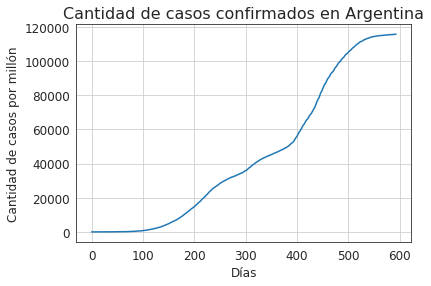

In [15]:
## Graficamos los Casos confirmados en Argentina (cada millón de habitantes)
data_arg = datos[datos.Entity == 'Argentina']
dias = np.arange(0, len(data_arg))

sns.lineplot(data=data_arg, x=dias, y='Total confirmed cases of COVID-19 per million people')
plt.xlabel('Días')
plt.ylabel('Cantidad de casos por millón')
plt.grid()
plt.title('Cantidad de casos confirmados en Argentina')
plt.show()

Esta es la curva de **casos totales** de la Argentina. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica


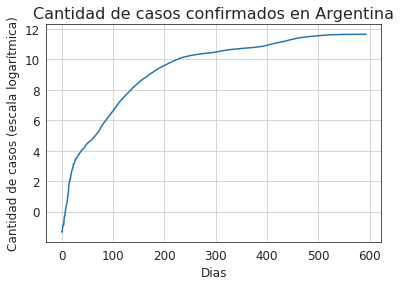

In [16]:
## Y en escala logarítmica
plt.plot(dias, np.log(data_arg['Total confirmed cases of COVID-19 per million people']))
plt.xlabel('Dias')
plt.ylabel('Cantidad de casos (escala logarítmica)')
plt.grid()
plt.title('Cantidad de casos confirmados en Argentina')
plt.show()

Veamos lo que pasa en los primeros 20 días desde que tenemos datos de casos en Argentina, para ver cómo fue el $k$ inicial

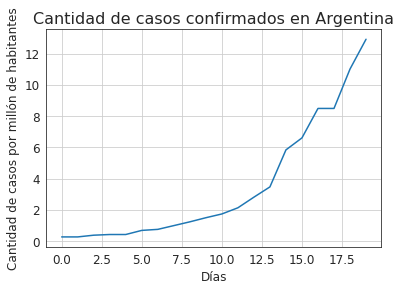

In [17]:
casos_principio=data_arg['Total confirmed cases of COVID-19 per million people'][0:20]
dias_principio=dias[0:20]

plt.plot(dias_principio,casos_principio)
plt.xlabel('Días')
plt.ylabel('Cantidad de casos por millón de habitantes')
plt.grid()
plt.title('Cantidad de casos confirmados en Argentina')
plt.show()

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

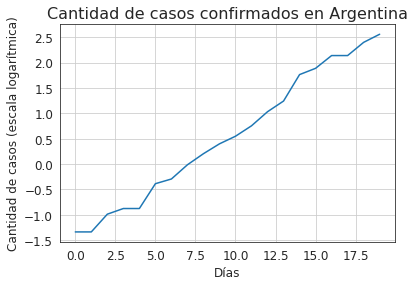

In [18]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('Días')
plt.ylabel('Cantidad de casos (escala logarítmica)')
plt.grid()
plt.title('Cantidad de casos confirmados en Argentina')
plt.show()

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [19]:
## Definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [20]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
popt

array([0.20351745, 6.23853154])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

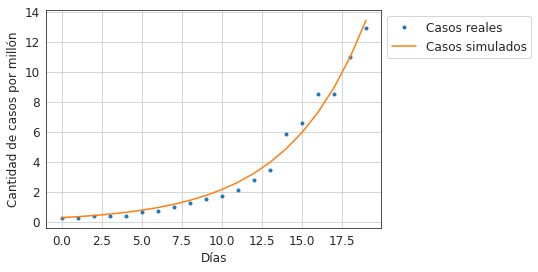

In [21]:
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.xlabel('Días')
plt.ylabel('Cantidad de casos por millón')
plt.legend(bbox_to_anchor=(1,1), loc="upper left", labels=['Casos reales', 'Casos simulados'])
plt.grid()
plt.show()

Como última pista, hagamos una función que determine los casos nuevos por día a partir de estas curvas. Puede ser útil para tu análisis.

In [22]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1
  return nuevos

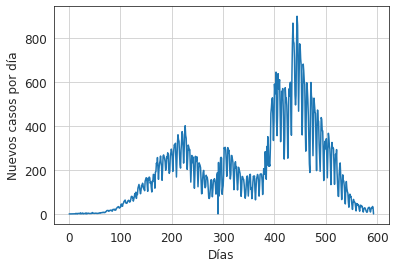

In [23]:
casos_arg=np.array(data_arg['Total confirmed cases of COVID-19 per million people'])
nuevos_arg=casos_nuevos(casos_arg)
plt.xlabel('Días')
plt.ylabel('Nuevos casos por día')
plt.plot(nuevos_arg)
plt.grid()
plt.show()

# Parte 1

A continuación vamos a seleccionar diez países del hemisferio Norte para graficar las curvas de casos $Confirmados = e^{k(t-t_0)}$ por millón. Como se mencionó anteriormente, debemos analizar si es posible estimar la evolución mundial de la pandemia a partir de cómo se fue desarrollando en ciertos países seleccionados.

In [24]:
## Seleccionamos los paises
data = pd.read_csv(covid_tests_cases_deaths_per_million)
paises = ['Andorra', 'Austria','Canada', 'Egypt', 'France','Israel','Japan', 'Qatar', 'Saudi Arabia', 'Sweden']
data_select = data[(data['Entity'].isin(paises))]
data_world  = data[(data['Entity'].isin(['World']))]

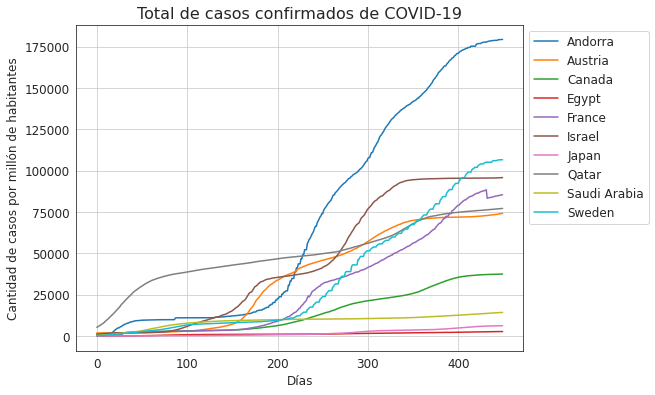

In [25]:
## Realizamos el gráfico de los casos para estos 10 paises
plt.figure(figsize=(8, 6))

for pais in paises:
   casos_pais = data_select['Total confirmed cases of COVID-19 per million people'][(data_select.Entity == pais)][50:500]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais)

plt.title('Total de casos confirmados de COVID-19')
plt.rc('axes')
plt.rc('xtick')    # fontsize of the tick labels
plt.rc('ytick')
plt.legend()
plt.ylabel('Cantidad de casos por millón de habitantes')
plt.xlabel('Días')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.grid()
plt.show()

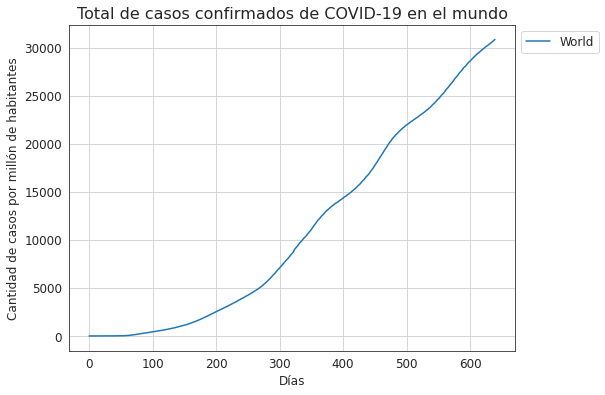

In [26]:
## Realizamos el gráfico de los casos en el mundo
casos_world = data_world['Total confirmed cases of COVID-19 per million people']
dias = np.arange(casos_world.shape[0]) 

plt.figure(figsize=(8, 6))
plt.plot(dias,casos_world, label = 'World')
plt.title('Total de casos confirmados de COVID-19 en el mundo')
plt.rc('axes')
plt.rc('xtick')    # fontsize of the tick labels
plt.rc('ytick')
plt.legend()
plt.ylabel('Cantidad de casos por millón de habitantes')
plt.xlabel('Días')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.grid()
plt.show()

In [27]:
## Primero vamos a delimitar los rangos de días que utilizaremos para calcular el k de cada pais
dataFiltrada = { 'Pais':  ['Andorra','Austria','Canada','Egypt','France','Israel','Japan','Qatar','Saudi Arabia','Sweden','World'],
  'DiaInicial': [200,150,200,50,200,120,100,0,50,200,100],
  'DiaFinal': [300,250,300,150,300,220,350,100,150,300,300]
 }

df = pd.DataFrame(dataFiltrada)

## Y calculamos los k de cada pais
ks = []
for i in range(len(df)):
 casosParaCalcularK = data['Total confirmed cases of COVID-19 per million people'][(data.Entity == df.Pais[i])][df.DiaInicial[i]:df.DiaFinal[i]]
 popt, pcov = curve_fit(exponencial, np.arange(df.DiaInicial[i],df.DiaFinal[i]), casosParaCalcularK, maxfev = 2000)
 ks.append(popt[0])
df['Ks'] = ks
df

,Pais,DiaInicial,DiaFinal,Ks
0,Andorra,200,300,0.023218
1,Austria,150,250,0.029876
2,Canada,200,300,0.014471
3,Egypt,50,150,0.031754
4,France,200,300,0.025791
5,Israel,120,220,0.021500
6,Japan,100,350,0.013006
7,Qatar,0,100,0.035213
8,Saudi Arabia,50,150,0.021575
9,Sweden,200,300,0.012232


In [28]:
k_world = ks[-1]
k_world

0.011409910655770576

## Parte 1.b) Bootstrap e intervalo de confianza:

In [29]:
## Bootstrap
def remuestreo(datos):
  remuestra=np.zeros(len(datos))
  i=0
  while i<len(datos):
    remuestra[i]=datos[np.random.randint(len(datos))]
    i=i+1
  return remuestra  

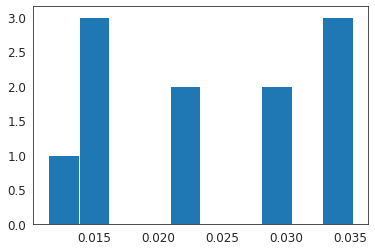

In [30]:
datos_rem=remuestreo(ks)
plt.hist(datos_rem)
plt.show()

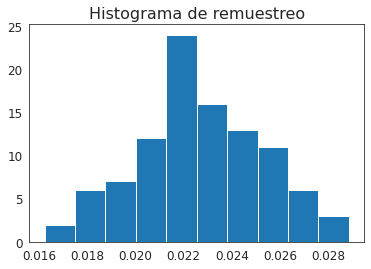

In [31]:
np.random.seed(8) # Elegir semilla.
nrep = 100
datos_100 = ks[0:10]
medias = []

for i in np.arange(nrep):
  datos_rem=remuestreo(datos_100)
  medias.append(np.mean(datos_rem))

plt.hist(medias)
mu_muestra    = np.mean(medias)
sigma_muestra = np.std(medias)
plt.title('Histograma de remuestreo')
plt.show()

En este caso si $\alpha=0.05$, corresponde $z_{aplha}=1.96$.

In [32]:
## Intervalo de conf:
z=1.96
n=len(medias)
int_conf=[mu_muestra-z*sigma_muestra/np.sqrt(n),
          mu_muestra+z*sigma_muestra/np.sqrt(n)]
print(int_conf)

[0.02222834148925366, 0.02324322068787352]


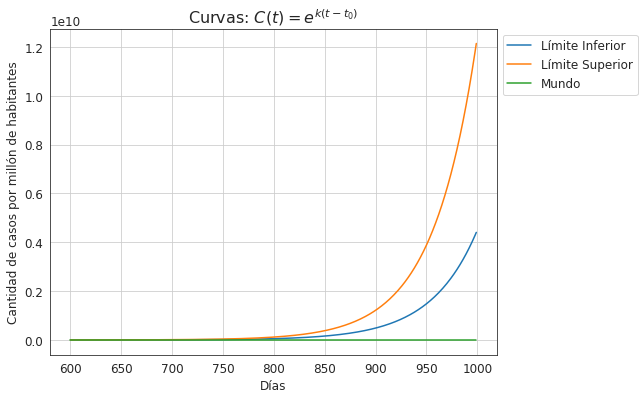

In [33]:
# Graficos de curvas:
k_min = int_conf[0]
k_max = int_conf[1]
k_world = ks[-1]

dias_principio = np.arange(600,1000)

casos_simu_min=exponencial(dias_principio,k_min,0)
casos_simu_max=exponencial(dias_principio,k_max,0)
casos_simu_world=exponencial(dias_principio,k_world,0)
plt.figure(figsize=(8, 6))
plt.plot(dias_principio,casos_simu_min,'-', label = 'Límite Inferior')
plt.plot(dias_principio,casos_simu_max,'-', label = 'Límite Superior')
plt.plot(dias_principio,casos_simu_world,'-', label = 'Mundo')
plt.title('Curvas: $C(t)=e^{k(t-t_0)}$')
plt.ylabel('Cantidad de casos por millón de habitantes')
plt.xlabel('Días')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.grid()
plt.show()

**Nota:** El $k$ del mundo no cae dentro del intervalo de confianza. Eso se da porque los intervalos de dias que tomamos, representan intervalos de $C(t)$ con $k$ muy variables entre países respecto de una vurva de $C(t)$ que se ve mas suavizada para los casos mundiales.

# Parte 2:

In [34]:
## Armamos una lista de países con y si cuarentena
paises_0 = ['Brazil','Venezuela','India','Bolivia','Sweden','Uruguay','Netherlands','Mexico','South Korea','Singapore','Dominican Republic']
paises_1 = ['Argentina','Italy','China','Spain','New Zealand','Australia','Norway','Germany','France','United Kingdom','Peru']
all_paises = ['Brazil','Venezuela','India','Bolivia','Sweden','Uruguay','Netherlands','Mexico','South Korea','Singapore','Dominican Republic',
              'Argentina','Italy','China','Spain','New Zealand','Australia','Norway','Germany','France','United Kingdom','Peru']
cuarentena = [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]

In [35]:
## Armamos el data set vacío con todos los países
dat = {'Pais': all_paises, 'k_deaths_mil': np.zeros(len(all_paises)), 'k_ill_mil': np.zeros(len(all_paises)), 'ratio_deaths_cases': np.zeros(len(all_paises)),'target': cuarentena}  
data_ml = pd.DataFrame(dat)
data_ml

,Pais,k_deaths_mil,k_ill_mil,ratio_deaths_cases,target
0,Brazil,0.0,0.0,0.0,0
1,Venezuela,0.0,0.0,0.0,0
2,India,0.0,0.0,0.0,0
3,Bolivia,0.0,0.0,0.0,0
4,Sweden,0.0,0.0,0.0,0
5,Uruguay,0.0,0.0,0.0,0
6,Netherlands,0.0,0.0,0.0,0
7,Mexico,0.0,0.0,0.0,0
8,South Korea,0.0,0.0,0.0,0
9,Singapore,0.0,0.0,0.0,0


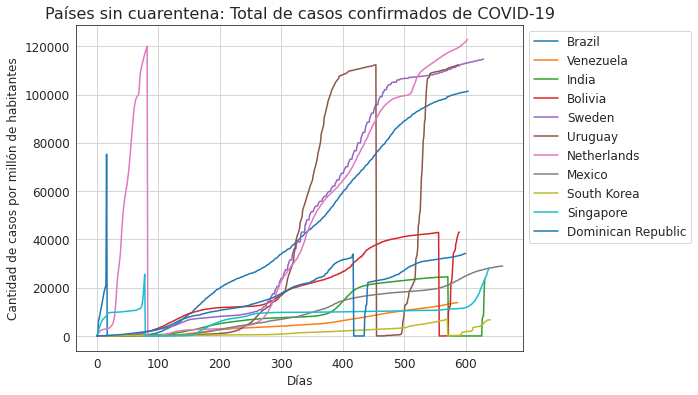

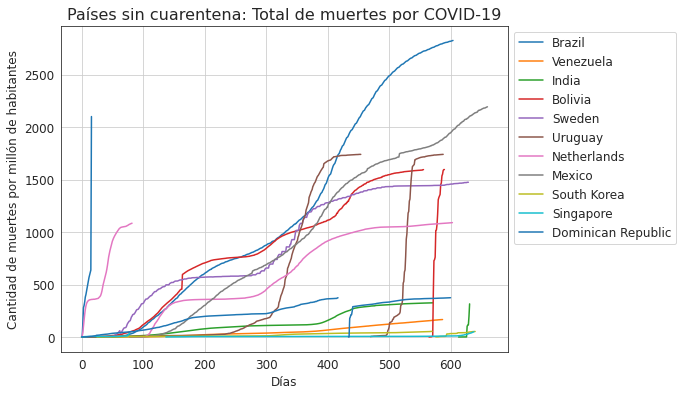

In [36]:
## Calculo de las k
# Las voy a calcular en función de los datos de
cases = 'Total confirmed cases of COVID-19 per million people'
deaths = 'Total confirmed deaths due to COVID-19 per million people'

## Exploratoria de charts de muertes y casos de países que no hicieron cuarentena:
# La idea es ver en que intervalo de dias tomar los datos tanto para casos como para muertes
# y ver que comportamiento tiene la curva de muertes: Expoencial u otra.

## Países sin cuarentena
## Ploteo en una sola figura
# Casos:
plt.figure(figsize=(8, 6))

for pais in paises_0:
   casos_pais = data[cases][(data.Entity == pais)]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais)

plt.title('Países sin cuarentena: Total de casos confirmados de COVID-19')
plt.rc('axes')
plt.rc('xtick')    # fontsize of the tick labels
plt.rc('ytick')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.ylabel('Cantidad de casos por millón de habitantes', )
plt.xlabel('Días' )
plt.grid()
plt.show()

# Muertes:
plt.figure(figsize=(8, 6))

for pais in paises_0:
   muertes_pais = data[deaths][(data.Entity == pais)]
   dias = np.arange(muertes_pais.shape[0]) 
   plt.plot(dias,muertes_pais,label = pais)

plt.title('Países sin cuarentena: Total de muertes por COVID-19', )
plt.rc('axes', )
plt.rc('xtick')    # fontsize of the tick labels
plt.rc('ytick')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.ylabel('Cantidad de muertes por millón de habitantes' )
plt.xlabel('Días' )
plt.grid()
plt.show()

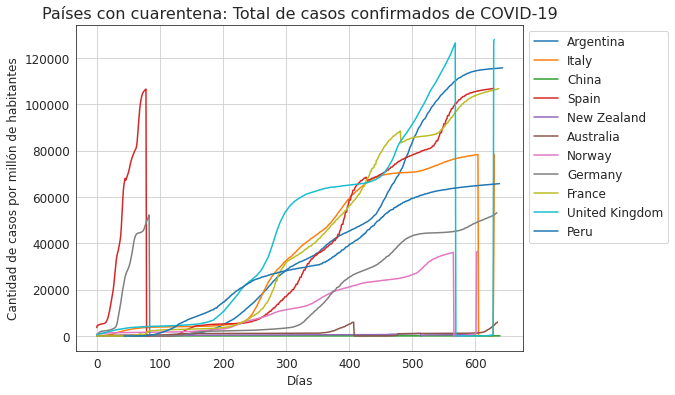

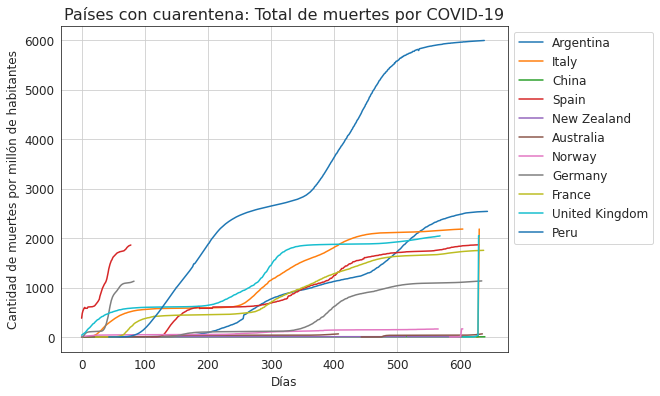

In [37]:
## Países con cuarentena:
# Casos:
plt.figure(figsize=(8, 6))

for pais in paises_1:
   casos_pais = data[cases][(data.Entity == pais)]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais)

plt.title('Países con cuarentena: Total de casos confirmados de COVID-19')
plt.rc('axes')
plt.rc('xtick')    # fontsize of the tick labels
plt.rc('ytick')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.ylabel('Cantidad de casos por millón de habitantes')
plt.xlabel('Días')
plt.grid()
plt.show()

# Muertes:
plt.figure(figsize=(8, 6))

for pais in paises_1:
   muertes_pais = data[deaths][(data.Entity == pais)]
   dias = np.arange(muertes_pais.shape[0]) 
   plt.plot(dias,muertes_pais,label = pais)

plt.title('Países con cuarentena: Total de muertes por COVID-19')
plt.rc('axes')
plt.rc('xtick')    # fontsize of the tick labels
plt.rc('ytick')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.ylabel('Cantidad de muertes por millón de habitantes')
plt.xlabel('Días')
plt.grid()
plt.show()

## Conclusiones del exploratorio visual de curvas:
- Por convenciencia voy a tomar el mismo intervalo de días: 200 a 400. De los puntos anteriores, este parece ser el promedio común de comportamiento exponencial de ambas curvas, tanto la de muertes por millon como la de contagios, que respomden a estos modelos:

- $Contagios=e^{k illMil(t-t_0)}$
- $Muertes=e^{k deaths(t-t_0)}$

## Armado de Data Set:

In [38]:
data_ml

,Pais,k_deaths_mil,k_ill_mil,ratio_deaths_cases,target
0,Brazil,0.0,0.0,0.0,0
1,Venezuela,0.0,0.0,0.0,0
2,India,0.0,0.0,0.0,0
3,Bolivia,0.0,0.0,0.0,0
4,Sweden,0.0,0.0,0.0,0
5,Uruguay,0.0,0.0,0.0,0
6,Netherlands,0.0,0.0,0.0,0
7,Mexico,0.0,0.0,0.0,0
8,South Korea,0.0,0.0,0.0,0
9,Singapore,0.0,0.0,0.0,0


In [39]:
## Calculo de k por países, y ratios y las agrego al data set que armé:
# Uso un fiteo por cuadrados mínimos exponencial:
# Lo hago para todos los países.

paises = all_paises
i = 0
for pais in paises:
    casos_pais = data[cases][(data.Entity == pais)][200:400]
    muertes_pais = data[deaths][(data.Entity == pais)][200:400]
    ratio_muertes_casos = np.mean(casos_pais)/np.mean(muertes_pais)
    dias = np.arange(200,400) 
    popt_casos , pcov_casos  = curve_fit(exponencial, dias, casos_pais, maxfev = 2000)       # Fiteo las exponenciales de casos.
    popt_muert , pcov_muert  = curve_fit(exponencial, dias, muertes_pais, maxfev = 2000)     # Fiteo las exponenciales de muertes.
    # Inserto los datos al df que voy a usar para hacer el modelo:
    data_ml.loc[i,('k_ill_mil')]          =  popt_casos[0]
    data_ml.loc[i,('k_deaths_mil')]       =  popt_muert[0]
    data_ml.loc[i,('ratio_deaths_cases')] =  ratio_muertes_casos
    i = i + 1

In [40]:
# Data final:
data_ml = data_ml.sample(frac=1).reset_index(drop=True) # Hago un shuffle.
data_ml

,Pais,k_deaths_mil,k_ill_mil,ratio_deaths_cases,target
0,Sweden,0.994621,0.994851,37.701052,0
1,Germany,0.993438,0.994830,42.892388,1
2,Peru,0.994492,0.991934,10.305984,1
3,Uruguay,0.993002,0.991685,73.654080,0
4,Norway,0.988282,0.988132,121.518993,1
5,Bolivia,0.987439,0.994536,19.813896,0
6,Venezuela,0.994574,0.990379,107.273620,0
7,United Kingdom,0.992110,0.994976,33.033959,1
8,Singapore,0.991647,0.994284,1971.395914,0
9,South Korea,0.992225,0.991484,59.324181,0


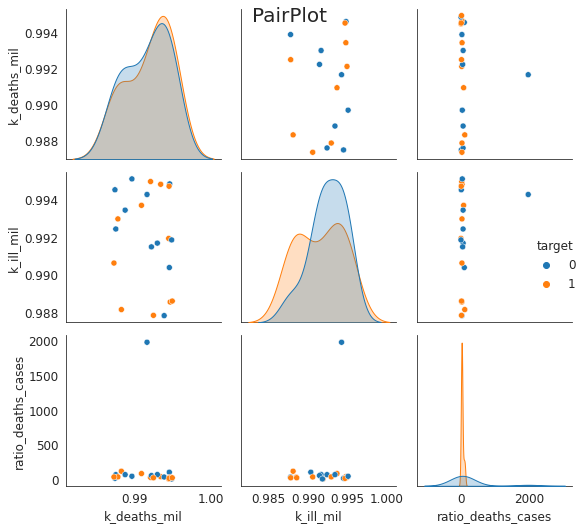

In [41]:
g=sns.pairplot(data=data_ml[['k_deaths_mil'	,'k_ill_mil',	'ratio_deaths_cases',	'target']],hue = 'target')
g.fig.suptitle ('PairPlot',fontsize=20,bbox={'facecolor':'1','pad':2})
plt.rcParams['figure.figsize'] =(20, 10)
plt.tight_layout()
plt.show()

## Machine learning: 
- Modelo de clasifiacación ml.
- Voy a usar Regresión Logística y Naive Bayes.

In [42]:
## Separo mi data en X e y:
X = data_ml[['k_deaths_mil','k_ill_mil','ratio_deaths_cases']]
y = data_ml[['target']] # Paises que hicieron cuarentena: 1, Paises que no hicieron cuarentena: 0.

## Separo en train y test:

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

## Naive Bayes:

nb = GaussianNB() # Benchmark para comparar contra Linear SVC y XGboost.
nb.fit(x_train,np.array(y_train).ravel())

## Regresion logistica:

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Gauss


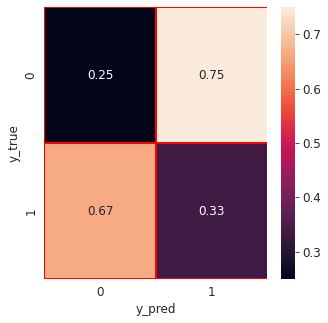

acc :  0.2857142857142857
F1 Score:  0.28571428571428575
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.25      0.33      0.29         3

    accuracy                           0.29         7
   macro avg       0.29      0.29      0.29         7
weighted avg       0.30      0.29      0.29         7

LogReg


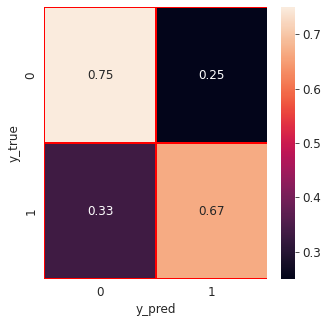

acc :  0.7142857142857143
F1 Score:  0.7083333333333333
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7



In [43]:
#--------
## Gauss:
#--------
print('Gauss')
y_pred_nb = nb.predict(x_test)
confusion(y_test,y_pred_nb)

print("acc : ",accuracy_score(y_test, y_pred_nb))
print("F1 Score: ", f1_score(y_test ,y_pred_nb, average='macro'))
print(classification_report(y_test, y_pred_nb))

#-----------------------
## Regresión Logistica:
#-----------------------
print('LogReg')
y_pred_logreg = logreg.predict(x_test)
confusion(y_test,y_pred_logreg)

print("acc : ",accuracy_score(y_test, y_pred_logreg))
print("F1 Score: ", f1_score(y_test ,y_pred_logreg, average='macro'))
print(classification_report(y_test, y_pred_logreg))